# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 4: CNN 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below.
- Please restart the kernel and run the entire notebook again before you submit. (Exception - you may skip the cells where you train neural networks, running the cells which load previously saved weights instead. However, **don't delete/overwrite the output that model.fit produced during training!**)

**Names of person you have worked with goes here:**
<br><BR>

<hr style="height:2pt">

In [3]:
import numpy as np

from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

## Additional Packages required if you don't already have them
# While in your conda environment,

# imageio
#       Install using "conda install imageio"
# pillow
#       Install using "conda install pillow"
# tensorflow-datasets
#       Install using "conda install tensorflow-datasets"
# tf-keras-vis
#       Install using "pip install tf-keras-vis"
# tensorflow-addons
#       Install using "pip install tensorflow-addons"

<div class="theme"> Overview </div> 


In this homework, we will explore Convolutional Neural Networks (CNNs).  We'll explore the mechanics of convolutional operations and how filters can extract certain features of images, increasing in abstraction with depth. Then we will build a CNN to classify CIFAR-10 images, a standard pedagogical problem, and use saliency maps to understand what the network is paying attention to. Finally, we will see that CNNs aren't just for classifying. They can serve as image input processing for a variety of tasks, as we will show by training a network to rotate faces upright.

<div class='exercise'> <b> Question 1: Convolutional Neural Network Mechanics [10pts total] </b></div>


As you know from lecture, in convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have shown themselves to have been very useful in image classification, as they allows the network to retain local spatial information for feature extraction.


**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes. 

**You may answer question 1.1 in this markdown cell by replacing the '?' marks with the correct value.**



A) Valid

$$
\left( \begin{array}{cccc}
13 & 15 & 16  \\
14 & 5 & 9  \\
22 & 7 & 11 
\end{array} \right)
$$
    
B) Same padding. We will accept solutions for all combinations (top & left, top & right, bottom & left, bottom & right).

Using top & left same padding
$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14\\
11 & 13 & 15 & 16 \\
15 & 14 & 5 & 9 \\
25 & 22 & 7 & 11
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14 & 4\\
11 & 13 & 15 & 16 & 10\\
15 & 14 & 5 & 9 & 5\\
25 & 22 & 7 & 11 & 5\\ 
7 & 16 & 5 & 5 & 6
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**You may answer question 1.2 in this markdown cell by replacing the '?' marks with the correct value.**

**A) size 2x2 and stride 2x2**

MaxPooling:
$$
\left( \begin{array}{cccc}
 ? &  ? \\
? & ? 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
? & ? \\
? & ?
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
? & ? & ? \\
? & ? & ? \\
? & ? & ? 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
? & ? & ? \\
? & ? & ? \\
? & ? & ?
\end{array} \right)
$$

## Answers

**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes.

**You may answer question 1.1 in this markdown cell by replacing the '?' marks with the correct value.**



A) Valid

$$
\left( \begin{array}{cccc}
13 & 15 & 16  \\
14 & 5 & 9  \\
22 & 7 & 11 
\end{array} \right)
$$
    
B) Same padding. We will accept solutions for all combinations (top & left, top & right, bottom & left, bottom & right).

Using top & left same padding
$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14\\
11 & 13 & 15 & 16 \\
15 & 14 & 5 & 9 \\
25 & 22 & 7 & 11
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
6 & 11 & 9 & 14 & 4\\
11 & 13 & 15 & 16 & 10\\
15 & 14 & 5 & 9 & 5\\
25 & 22 & 7 & 11 & 5\\ 
7 & 16 & 5 & 5 & 6
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**You may answer question 1.2 in this markdown cell by replacing the '?' marks with the correct value.**

**A) size 2x2 and stride 2x2**

MaxPooling:
$$
\left( \begin{array}{cccc}
 3 &  4 \\
5 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
\frac{7}{4} & \frac{9}{4}\\
3 & \frac{9}{4} 
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
3 & 2 & 4 \\
4 & 2 & 2 \\
5 & 2 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
\frac{7}{4} & \frac{7}{4} & \frac{9}{4} \\
\frac{9}{4} & 1 & \frac{5}{4} \\
3 & \frac{5}{4}  & \frac{9}{4} 
\end{array} \right)
$$

<div class='exercise'> <b> Question 2: CNNs at Work [30pts total]  </b></div>

Consider the following image of Widener Library:

![Widener Library](data/Widener_Library.jpg)

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.

**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
    x = 0
else:
    x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?


**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)

**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.


## Answers

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.


In [4]:
# your code here 
library_image_data = np.asarray(Image.open('data/Widener_Library.jpg'))
print(np.shape(library_image_data))
library_image_data = library_image_data.astype('float32')
library_image_data /= 255.0


(267, 400, 3)


**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.


Text(0.5, 1.0, 'Blurred')

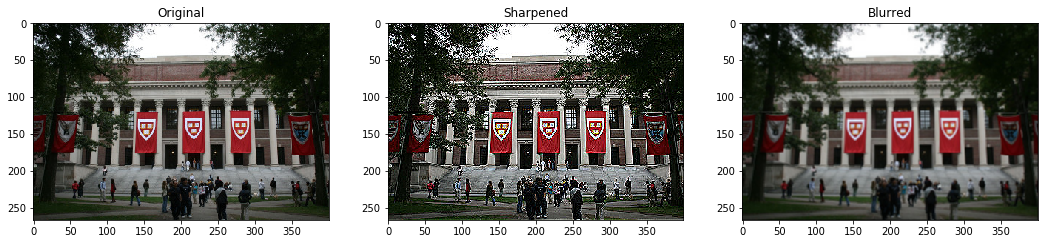

In [5]:
sharpening = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
blurring = (1/9)*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
sharpened_img = np.zeros(np.shape(library_image_data))
for i in range(3):
    sharpened_img[:, :, i] = convolve2d(
        library_image_data[:, :, i], sharpening, boundary='fill', mode='same')
# plt.imshow(np.clip(sharpened_img,0,1))

blurred_img = np.zeros(np.shape(library_image_data))
for i in range(3):
    blurred_img[:, :, i] = convolve2d(
        library_image_data[:, :, i], blurring, boundary='fill', mode='same')
# plt.imshow(np.clip(blurred_img,0,1))

fig, (original, sharp, blur) = plt.subplots(1, 3, figsize=(18, 6))
original.imshow(np.clip(library_image_data, 0, 1))
original.set_title('Original')
sharp.imshow(np.clip(sharpened_img, 0, 1))
sharp.set_title('Sharpened')
blur.imshow(np.clip(blurred_img, 0, 1))
blur.set_title('Blurred')

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
x = 0
else:
x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?



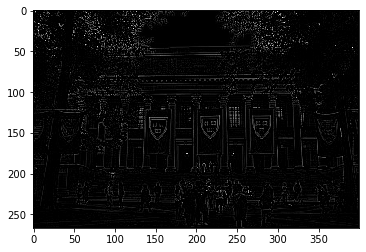

In [6]:
# your code here
norm_img = (-0.5) + library_image_data
kernel = 1/3 * np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
norm = np.zeros((np.shape(norm_img)[0], np.shape(norm_img)[1]))
norm[:, :] = convolve2d(norm_img[:, :, 0], kernel, boundary='fill', mode='same') + convolve2d(norm_img[:, :, 1],
                                                                                              kernel, boundary='fill', mode='same') + convolve2d(norm_img[:, :, 2], kernel, boundary='fill', mode='same')

plt.imshow(np.clip(norm, a_min=0., a_max=None),  cmap='gray')

*Your answer here*

**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.


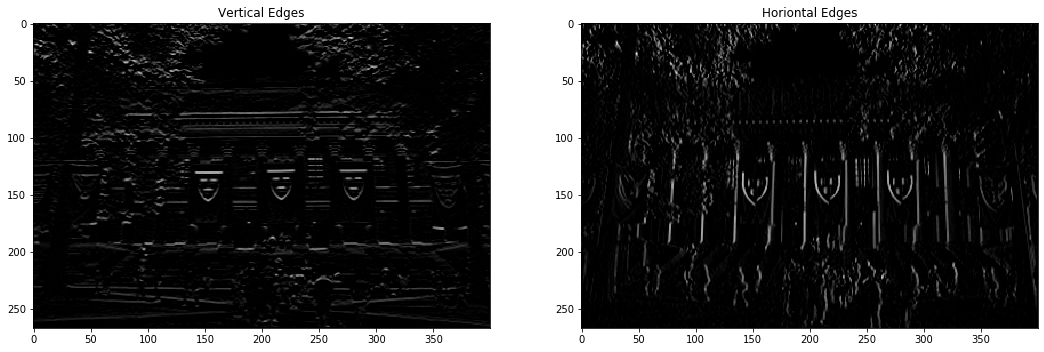

In [7]:
# I will use the sobel vertical edge detection
# kernel applied independently to each channel
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
hedges = np.zeros((np.shape(norm_img)[0], np.shape(norm_img)[1]))
vedges = np.zeros((np.shape(norm_img)[0], np.shape(norm_img)[1]))

hedges[:, :] = convolve2d(library_image_data[:, :, 0], sobel_x, boundary='fill', mode='same') + convolve2d(library_image_data[:, :, 1],
                                                                                                           sobel_x, boundary='fill', mode='same') + convolve2d(library_image_data[:, :, 2], sobel_x, boundary='fill', mode='same')
vedges[:, :] = convolve2d(library_image_data[:, :, 0], sobel_y, boundary='fill', mode='same') + convolve2d(library_image_data[:, :, 1],
                                                                                                           sobel_y, boundary='fill', mode='same') + convolve2d(library_image_data[:, :, 2], sobel_y, boundary='fill', mode='same')

# plt.imshow(np.clip(blurred_img,0,1))

fig, (v_edge, h_edge) = plt.subplots(1, 2, figsize=(18, 6))
v_edge.set_title('Vertical Edges')
v_edge.imshow(np.clip(vedges, a_min=0., a_max=None), cmap='gray')
h_edge.set_title('Horiontal Edges')
h_edge.imshow(np.clip(hedges, a_min=0., a_max=None), cmap='gray')

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)


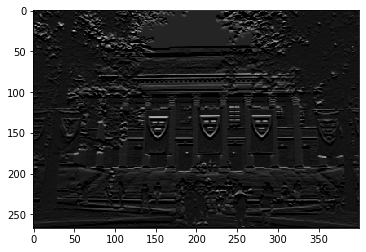

In [8]:
# your code here
feature_map = np.zeros((np.shape(vedges)[0], np.shape(vedges)[1], 2))
feature_map[:, :, 0] = vedges
feature_map[:, :, 1] = hedges
bias = 1
b_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
output = np.zeros((np.shape(vedges)[0], np.shape(vedges)[1]))
output[:, :] = convolve2d(feature_map[:, :, 0], b_kernel, boundary='fill', mode='same') + \
    convolve2d(library_image_data[:, :, 1], b_kernel,
               boundary='fill', mode='same') + bias
plt.imshow(np.clip(output, a_min=0., a_max=None), cmap='gray')

# your code here


**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.

*Your answer here*

<div class='exercise'> <b> Question 3: Building a Basic CNN Model [30pts total] </b></div>

In this question, you will use Keras to create a convolutional neural network for predicting the type of object shown in images from the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.


<span class='sub-q'> Loading CIFAR-10 and Constructing the Model. </span>

Load CIFAR-10 and use a combination of the following layers: Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order, and you can use as many layers as you'd like) to build your classification model. You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should construct the network yourself and not use a pre-written implementation. At least one of your Conv2D layers should have at least 9 filters to be able to do question 3.3.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on a system using GPUs. On CPUs, this training can take over an hour. On GPUs, it can be done within minutes. If you become frustrated having to rerun your model every time you open your notebook, take a look at how to save your model weights as explicitly detailed in **question 4**, where it is required to save your weights.

You can approach the problems in this question by first creating a model assigning 32 filters to each Conv2D layer recreate the model with 64 filters/layer, 128, etc. For each generated model, keep track of the total number of parameters.

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
 **[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

**Techniques to Visualize the Model.**

We will gain an intuition into how our model is processing the inputs in two ways.  First we'll ask you to use feature maps to visualize the activations in the intermediate layers of the network. We've provided a helper function `get_feature_maps` to aid in extracting feature maps from layer outputs in your model network.  Feel free to take advantage of it if you'd like.  We'll also ask you to use [saliency maps](https://arxiv.org/abs/1312.6034) to visualize the pixels that have the largest impact on the classification of an input (image in this case), as well as a more recent development,[Grad-CAM](https://arxiv.org/abs/1610.02391), which has been shown to better indicate the attention of CNNs.

**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.

**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?

**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

*Some code that will help you generate feature maps*

In [9]:
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

*A dictionary to turn class index into class labels for CIFAR-10*

In [10]:
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

*Some imports for getting the CIFAR-10 dataset and for help with visualization*

In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

## Answers

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

Note the following test models below, which in which I double the number of filters twice, and both times the total number of parameters also doubles. The total number of parameters is thus a product of the number of payers.

__TODO:__ Add plot and confirm equation.

In [12]:
model_1 = Sequential()  # Create sequential model
model_1.add(Conv2D(filters=2, kernel_size=(2, 2), input_shape=(
    32, 32, 3), padding="same", activation="relu"))
model_1.summary()
model_2 = Sequential()  # Create sequential model
model_2.add(Conv2D(filters=2, kernel_size=(4, 4), input_shape=(
    32, 32, 3), padding="same", activation="relu"))
model_2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 2)         26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 2)         98        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


Please note my model below, which is inspired by Alexnet. It has 10,146,634 parameters. 

In [13]:
from keras.datasets import cifar10
from keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# your code here
model = Sequential()  # Create sequential model
model.add(Conv2D(filters=9, kernel_size=(3, 3), input_shape=(
    32, 32, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=2048,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Using TensorFlow backend.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 9)         252       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        5248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

In [14]:
# your code here


*Your answer here*

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
**[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

In [15]:
model = tf.keras.models.load_model('my_model.h5')

# history = model.fit(x_train, to_categorical(y_train),
#                     epochs=20, validation_split=0.2, shuffle=True)



In [16]:


loss, accuracy = model.evaluate(x_test, to_categorical(y_test),verbose=0)
print("Accuracy:",accuracy)



Accuracy: 0.7252


In [17]:
# plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

In [ ]:
# Save weights
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [18]:
# Load saved weights
model = tf.keras.models.load_model('my_model.h5')



**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.


[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
[3 1 8 8 6 6 1 6 3 1 3 9 5 7 9 0 5 7 8 6]
(9, 32, 32)


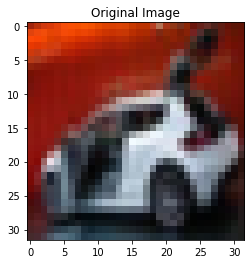

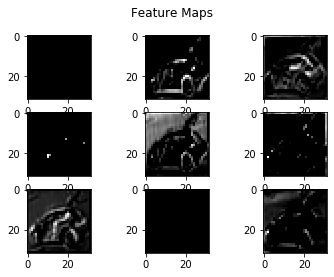

In [19]:
# your code here

test_img = np.reshape(x_test[0:20], (20,32,32,3))
test_label = to_categorical(np.reshape(y_test[0:20], (20,1)))
y_prob = model.predict(test_img.astype('float32'))
y_classes = y_prob.argmax(axis=-1)
fig, ax = plt.subplots()
ax.imshow(test_img[6])
ax.set_title("Original Image")

print(y_test[0:20].flatten())
print(y_classes)
# From Above, I know that the x_test[0] is a valid mapping

feature_maps = get_feature_maps(model, 0, test_img[6])
print(np.shape(feature_maps))
fig, ax = plt.subplots(3,3)


fig.suptitle('Feature Maps')
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(feature_maps[i*3+j,:,:], cmap='gray')






**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?


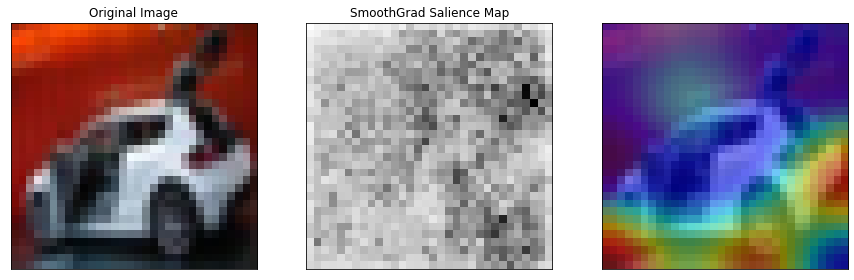

In [20]:
# your code here 
#Code Via https://github.com/keisen/tf-keras-vis/blob/master/examples/attentions.ipynb
from tensorflow.keras import backend as K

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam
from matplotlib import cm



# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Saliency object
saliency = Saliency(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda output: K.mean(output[:, 0])
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss, test_img[6].astype('float32'), smooth_samples=20)
saliency_map = normalize(saliency_map)

gradcam = Gradcam(model, model_modifier)
# Generate heatmap with GradCAM
cam = gradcam(loss, test_img[6].astype('float32'))
cam = normalize(cam)


f, ax = plt.subplots(1,3,figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(test_img[6])
ax[0].set_title("Original Image")
ax[1].imshow(saliency_map[0], cmap='Greys')
ax[1].set_title("SmoothGrad Salience Map")

heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
ax[2].imshow(test_img[6])
ax[2].imshow(heatmap, cmap='jet', alpha=0.5)
    
    

*Your answer here*


**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

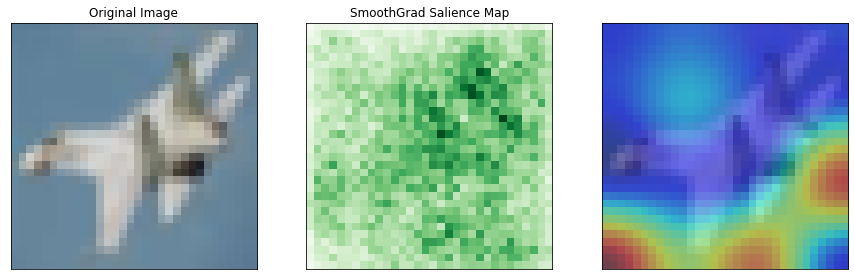

In [21]:
# your code here 
#Code Via https://github.com/keisen/tf-keras-vis/blob/master/examples/attentions.ipynb
from tensorflow.keras import backend as K

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam
from matplotlib import cm



# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Saliency object
saliency = Saliency(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda output: K.mean(output[:, 0])
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss, test_img[10].astype('float32'), smooth_samples=20)
saliency_map = normalize(saliency_map)

gradcam = Gradcam(model, model_modifier)
# Generate heatmap with GradCAM
cam = gradcam(loss, test_img[6].astype('float32'))
cam = normalize(cam)


f, ax = plt.subplots(1,3,figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(test_img[10])
ax[0].set_title("Original Image")
ax[1].imshow(saliency_map[0], cmap='Greens')
ax[1].set_title("SmoothGrad Salience Map")

heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
ax[2].imshow(test_img[10])
ax[2].imshow(heatmap, cmap='jet', alpha=0.5)






*Your answer here*

<div class='exercise'> <b> Question 4: Image Orientation Estimation [30pts] </b></div>

In this problem we will construct a neural network to predict how far a face is from being "upright". Image orientation estimation with convolutional networks was first implemented in 2015 by Fischer, Dosovitskiy, and Brox in a paper titled ["Image Orientation Estimation with Convolutional Networks"](https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf), where the authors trained a network to straighten a wide variety of images using the Microsoft COCO dataset. In order to have a reasonable training time for a homework, we will be working on a subset of the problem where we just straighten images of faces. To do this, we will be using the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset of celebrity faces, where we assume that professional photographers have taken level pictures. The training will be supervised, with a rotated image (up to $\pm 60^\circ$) as an input, and the amount (in degrees) that the image has been rotated as a target. 

The network training for this question can be long (even using a GPU on the JupyterHub, it can take 1-2 hours to reach peak network performance), but deep learning generally requires substantial training times on the order of days or weeks. One aim of this problem is to give you a gentle introduction to some techniques for prototyping such networks before a full training.

<span class='sub-q'>  Loading CelebA and Rotating Images. [5 pts] </span>

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

<span class='sub-q'> Building a Model. [11pts total]</span>

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.

**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

<span class='sub-q'> Saving a Model. [3pts total]</span>

There are various ways to save a model, to various degrees. You can simply save the weights, you can save just the architecture, or you can save the whole model, including the state of the optimizer. The final way allows you to restart training as if it never stopped. For our purposes, we will only be saving the weights for simplicity. This way tends to be the most robust, and in general you'll usually have fewer problems running your model on other machines, or interfacing with other packages like tf-keras-vis.

**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.
    
    Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

<span class='sub-q'> Testing your model. [11pts total]</span>

**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.

**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__

**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

## Answers

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**


In [22]:
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

# This line will download the CelebA dataset. The download will only happen the first time you ever run this cell.
train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False)

In [23]:
# You may use the following two functions
def normalize_image(img):
    return tf.cast(img, tf.float32)/255.

def rot_resize(img, deg):
    rotimg = ndimage.rotate(img, deg, reshape=False, order=3)
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

################################################################
# Don't manually invoke these functions; they are for Dataset 
# pipelining that is already done for you.
################################################################
def tf_rot_resize(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

def tf_random_rotate_helper(image):
    """Dataset pipe that normalizes image to [0.,1.] and rotates by a random
    amount of degrees in [-60.,60.], returning an (input,target) pair consisting
    of the rotated and resized image and the degrees it has been rotated by."""
    image = normalize_image(image)
    deg = tf.random.uniform([],-60.,60.)
    return (tf_rot_resize(image,deg), deg)  # (data, label)

def tf_random_rotate_image(element):
    """Given an element drawn from the CelebA dataset, this returns a rotated
    image and the amount it has been rotated by, in degrees."""
    image = element['image']
    image, label = tf_random_rotate_helper(image)
    image.set_shape((140,120,3))
    return image, label
################################################################

In [24]:
# Pipeline for creating randomly rotated images with their target labels being 
# the amount they were rotated, in degrees.
train_rot_ds = train_celeb.map(tf_random_rotate_image)
test_rot_ds = test_celeb.map(tf_random_rotate_image)

*Your answer here*

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


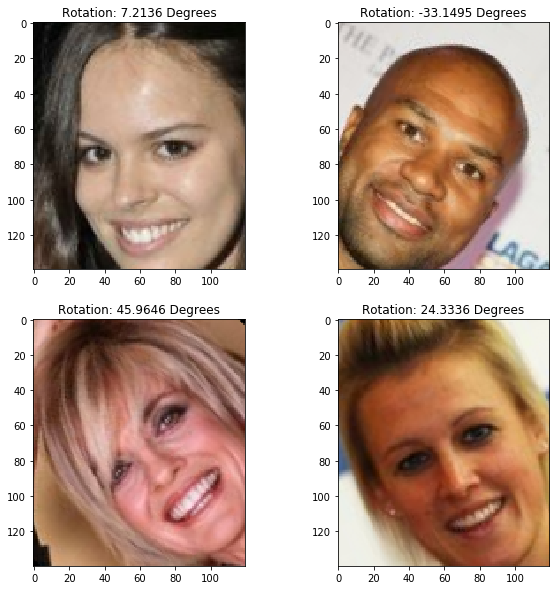

In [25]:
# your code here
dataset = train_rot_ds.take(4)
iterator = dataset.make_one_shot_iterator()
fig,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flat
for i in range(4):
    img,label = iterator.get_next()
    ax[i].set_title("Rotation: "+str(np.around(label.numpy(),4))+" Degrees")
    ax[i].imshow(img)

# # print(np.shape(image_batch))
# print(label_batch)

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.


*Your answer here*

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.


In [28]:
from keras import backend as BK

# Clamping value between the known min and max
def mapping_to_target_range( x, target_min=-60, target_max=60) :
    x02 = BK.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min




# your code here
model = Sequential()  # Create sequential model
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same",
                 activation="relu", input_shape=(140, 120, 3)))
model.add(Conv2D(filters=16, kernel_size=(3, 3),
                 padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation=mapping_to_target_range))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 140, 120, 16)      5824      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 140, 120, 16)      30992     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 70, 60, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 70, 60, 32)        4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 70, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 30, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33600)            

In [ ]:
# your code here


**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

In [ ]:
# your code here

model.fit(
    train_rot_ds.batch(200),
    epochs=3, validation_data=test_rot_ds.batch(200))




Epoch 1/3
      1/Unknown - 6s 6s/step - loss: 17.2352 - mse: 17.2352

**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.


*Your answer here*

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.

Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

In [ ]:
# your code here


**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.


In [ ]:
# your code here


**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__


In [ ]:
# your code here


*Your answer here*


**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

In [ ]:
# your code here
